Data Exploration and Preprocessing :
o Analyze the dataset for trends, missing values, and outliers.
o Perform data cleaning, feature engineering, and transformations.


In [12]:
import pandas as pd  
df = pd.read_csv("Airbnb_data.csv")  
df.info()  # Check dataset info  
df.describe()
def detect_outliers(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
    return outliers
print("\nOutliers in Airbnb Data:")
print(detect_outliers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [2]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117      2.0   2.0  
4                                                NaN   20009      0.0   1.0  

[5 rows x 29 columns]

In [2]:
print(df.isnull().sum())  


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [3]:
df.drop(columns=['id', 'name', 'description', 'thumbnail_url', 'first_review', 'last_review'], inplace=True)  


In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)  
categorical_cols = df.select_dtypes(include=['object']).columns  
df[categorical_cols] = df[categorical_cols].fillna('Unknown')  


Model Development 
o Build a regression model to predict listing prices.

In [5]:
import numpy as np  
df['price'] = np.exp(df['log_price'])  
df.drop(columns=['log_price'], inplace=True)  


In [6]:
X = df.drop(columns=['price'])  
y = df['price']  


In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer  

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns  
categorical_features = X.select_dtypes(include=['object']).columns  

preprocessor = ColumnTransformer([  
    ('num', StandardScaler(), numeric_features),  
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
])  


In [9]:
from sklearn.pipeline import Pipeline  
from sklearn.linear_model import LinearRegression  

model = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])  
model.fit(X_train, y_train)  
print("Model Training Completed!")  


Model Training Completed!


Model Evaluation:
o Evaluate the model’s performance using appropriate metrics like RMSE,
MAE, and R².

In [10]:
y_pred = model.predict(X_test)  


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"RMSE: {rmse}")  
print(f"MAE: {mae}")  
print(f"R² Score: {r2}")  


RMSE: 237.877427656767
MAE: 157.69121732525295
R² Score: -0.9321820590475973


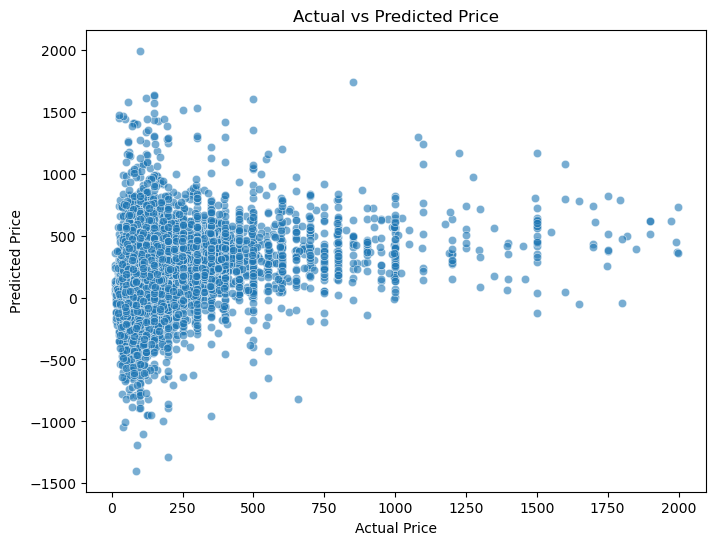

In [12]:
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(8,6))  
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)  
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")  
plt.title("Actual vs Predicted Price")  
plt.show()  
